In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

%matplotlib inline

In [135]:
df_control = pd.read_csv("../data_files/clean/web_data_filtered_control.csv")
df_test = pd.read_csv("../data_files/clean/web_data_filtered_test.csv")

In [136]:
#function to drop values which list 'confirm', as there is no way to encounter an error at this step 
def remove_confirms(df):
    df_steps = df[df['process_step'] != 'confirm']
    return df_steps

In [141]:
df_control = remove_confirms(df_control)
df_test = remove_confirms(df_test)

In [144]:
def error_counts(df):
    grouped_counts = df.groupby('client_id')['process_step'].value_counts()
    adjusted_counts_df = grouped_counts.reset_index(name='error_count')
    adjusted_counts_df['error_count'] = adjusted_counts_df['error_count'] - 1
    adjusted_counts_df.columns = ['client_id', 'process_step', 'error_count']
    return adjusted_counts_df

In [148]:
df_control_error = error_counts(df_control)
df_test_error = error_counts(df_test)
df_control_error["variation"] = 'control'
df_test_error["variation"] = 'test'

In [149]:
df_control_error

,client_id,process_step,error_count,variation
0,1028,step_1,4,control
1,1028,step_2,1,control
2,1028,start,0,control
3,1028,step_3,0,control
4,1104,start,1,control
...,...,...,...,...
78849,9998346,step_2,3,control
78850,9998346,step_3,3,control
78851,9998346,step_1,1,control
78852,9998346,start,0,control


In [190]:
df_merged_error = pd.concat([df_test_error, df_control_error], axis=0, ignore_index=True)

PROCESS STEP BY ERROR COUNT

In [212]:
df_control_error_group1 = df_control_error.groupby("process_step")["error_count"].sum()
df_control_error_group1

process_step
start     24211
step_1     9319
step_2     7011
step_3     5188
Name: error_count, dtype: int64

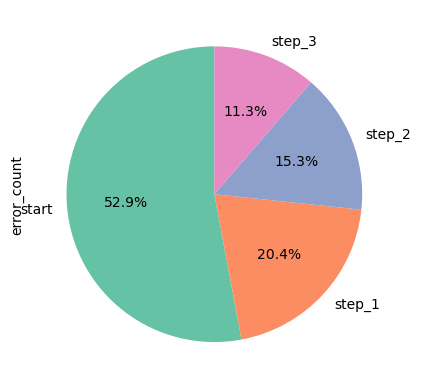

In [214]:
df_control_error_group1.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"));

In [215]:
df_test_error_group1 = df_test_error.groupby("process_step")["error_count"].sum()
df_test_error_group1

process_step
start     29795
step_1    14337
step_2     8560
step_3     4876
Name: error_count, dtype: int64

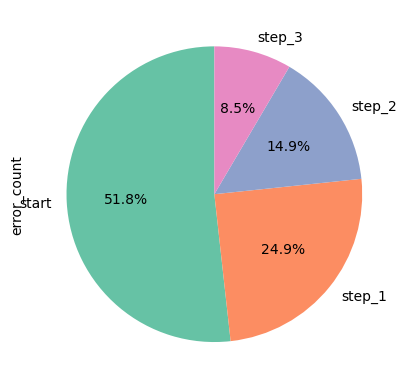

In [216]:
df_test_error_group1.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"));

AVERAGE ERROR RATES

In [191]:
df_control_error_group = df_control_error.groupby("client_id")["error_count"].sum()
df_control_error_group.describe()

count    23397.000000
mean         1.954481
std          3.571226
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         78.000000
Name: error_count, dtype: float64

In [192]:
df_test_error_group = df_test_error.groupby("client_id")["error_count"].sum()
df_test_error_group.describe()

count    26679.000000
mean         2.157802
std          3.759256
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         76.000000
Name: error_count, dtype: float64

AVERAGE ERROR RATES, ADJUSTED FOR OUTLIERS

In [193]:
df_test_filtered = df_test_error[df_test_error["error_count"] <= 20]
df_control_filtered = df_control_error[df_control_error["error_count"] <= 20]

df_test_error_group1 = df_test_filtered.groupby("client_id")["error_count"].sum()
df_control_error_group1 = df_control_filtered.groupby("client_id")["error_count"].sum()


In [195]:
df_test_error_group1.describe()

count    26679.000000
mean         2.145433
std          3.661607
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         66.000000
Name: error_count, dtype: float64

In [194]:
df_control_error_group1.describe()

count    23397.000000
mean         1.894474
std          3.181577
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         45.000000
Name: error_count, dtype: float64

HYPOTHESIS TESTING, ERROR RATES

H0 = Average number of errors per user in the test group was equal to or greater than the control group

H1 = Average number of errors per user in the test group was less than the control group

In [ ]:
error_test_mean = df_test_error_group.mean()
error_control_mean = df_control_error_group.mean()


1.9544813437620208

Statistics=0.000, p=0.500
Fail to reject the null hypothesis - no significant evidence that the mean time for Test is less.
